#Linear Algebra Applications Assignment





### Your data:

**chirps_per_sec** = chirps/sec for the striped ground cricket

**temperature** = temperature in degrees Fahrenheit

Reference: The Song of Insects by Dr.G.W. Pierce, Harvard College Press

In [0]:
import pandas as pd

df = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/excel/slr02.xls')
df = df.rename(columns={'X':'chirps_per_sec', 'Y':'temperature'})

print(df.shape)
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'
(15, 2)


,chirps_per_sec,temperature
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998


## 1) Graph a scatterplot of chirps_per_sec vs temperature 

Text(0, 0.5, 'Chirps per second')

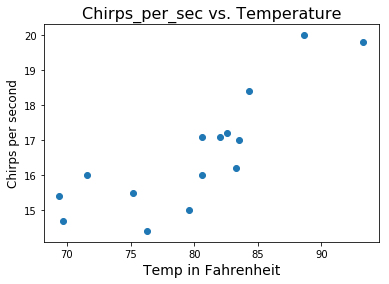

In [0]:
import matplotlib.pyplot as plt
plt.scatter(df['temperature'], df['chirps_per_sec'])
plt.title('Chirps_per_sec vs. Temperature', fontsize=16)
plt.xlabel('Temp in Fahrenheit', fontsize=14)
plt.ylabel('Chirps per second', fontsize=12)

## 2) Follow the steps below to compute the coefficients (intercept and slope) for the line of best fit:

## 2.1) Use np.ones to add a column of ones to the dataframe

In [0]:
import numpy as np
df['Ones'] = np.ones(15)
df.shape
df.head()

,chirps_per_sec,temperature,Ones
0,20.000000,88.599998,1.0
1,16.000000,71.599998,1.0
2,19.799999,93.300003,1.0
3,18.400000,84.300003,1.0
4,17.100000,80.599998,1.0


## 2.2) Create your X matrix from the 'ones' and 'temperature' columns

In [0]:
X = df[['Ones', 'temperature']].as_matrix()
print(X)

[[ 1.         88.59999847]
 [ 1.         71.59999847]
 [ 1.         93.30000305]
 [ 1.         84.30000305]
 [ 1.         80.59999847]
 [ 1.         75.19999695]
 [ 1.         69.69999695]
 [ 1.         82.        ]
 [ 1.         69.40000153]
 [ 1.         83.30000305]
 [ 1.         79.59999847]
 [ 1.         82.59999847]
 [ 1.         80.59999847]
 [ 1.         83.5       ]
 [ 1.         76.30000305]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


## 2.3) Create your Y vector from the chips_per_sec column. (Make sure that it is formatted as a column vector.)

In [0]:
Y = df['chirps_per_sec'].as_matrix().reshape(-1, 1)
print(Y)

[[20.        ]
 [16.        ]
 [19.79999924]
 [18.39999962]
 [17.10000038]
 [15.5       ]
 [14.69999981]
 [17.10000038]
 [15.39999962]
 [16.20000076]
 [15.        ]
 [17.20000076]
 [16.        ]
 [17.        ]
 [14.39999962]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


## 2.4) Calculate X_transpose and print the result: $X^{T}$ 

In [0]:
X_transpose = np.transpose(X)
print(X_transpose)

[[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.        ]
 [88.59999847 71.59999847 93.30000305 84.30000305 80.59999847 75.19999695
  69.69999695 82.         69.40000153 83.30000305 79.59999847 82.59999847
  80.59999847 83.5        76.30000305]]


## 2.5) Calculate X_transpose_X and print the result: $X^{T}X$

In [0]:
X_transpose_X = np.matmul(X_transpose, X)
print(X_transpose_X)

[[1.50000000e+01 1.20060000e+03]
 [1.20060000e+03 9.67258599e+04]]


## 2.6) Calculate the inverse of X_transpose_X and print the result: $(X^{T}X)^{-1}$ 

In [0]:
inverse = np.linalg.inv(X_transpose_X)
print(inverse)

[[ 1.02382034e+01 -1.27080669e-01]
 [-1.27080669e-01  1.58771451e-03]]


## 2.7) An aside: Multiply the X_tranpose_X matrix against its inverse: $(X^{T}X)(X^{T}X)^{-1}$  Print the result. What is the name for the resulting matrix?

In [0]:
inverse_X_transpose = np.matmul(X_transpose_X, inverse)
print(inverse_X_transpose)
# identity matrix

[[1.00000000e+00 6.01565053e-17]
 [3.50588784e-13 1.00000000e+00]]


## 2.8) Calculate X_transpose_Y and print the result: $X^{T}Y$

In [0]:
X_transpose_Y = np.matmul(X_transpose, Y)
print(X_transpose_Y)

[[  249.80000019]
 [20127.47000262]]


## 2.9) Finally, calculate the Beta coefficients vector by multiplying the left and right halfs of the linear regression equation. Print the Beta vector: $\beta = (X^{T}X)^{-1} X^{T}Y$  
(You should have all of the parts to do this now)

In [0]:
beta = np.matmul(inverse, X_transpose_Y)
print(beta)

[[-0.3091419 ]
 [ 0.21192498]]


## 3) Graph the line of best fit through the scatterplot of the data points

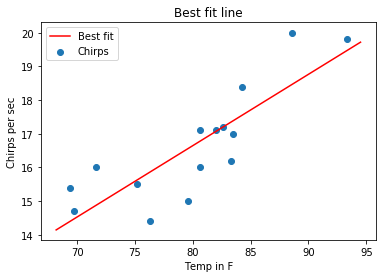

In [0]:
beta_0 = beta[0,0]
beta_1 = beta[1,0]

plt.scatter(df['temperature'], df['chirps_per_sec'])
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = beta_0 + beta_1 * x_vals
plt.plot(x_vals, y_vals, '-', color='r')
plt.title("Best fit line")
plt.xlabel("Temp in F")
plt.ylabel("Chirps per sec")
axes.legend(['Best fit', 'Chirps'])
plt.show()

## 4) If a cricket has chirped 19 times in a second what is the predicted temperature? Plot this prediction as well.

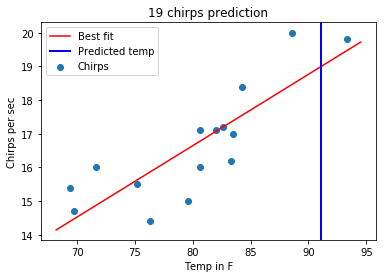

In [0]:
chirped = 19
temp = (chirped - beta_0)/beta_1
plt.scatter(df['temperature'], df['chirps_per_sec'])
axes = plt.gca()
plt.plot(x_vals, y_vals, '-', color='r')
plt.axvline(temp, linewidth=2, color='b')
plt.title("19 chirps prediction")
plt.xlabel('Temp in F')
plt.ylabel('Chirps per sec')
axes.legend(['Best fit', 'Predicted temp', 'Chirps'])
plt.show()

##Stretch Problem
Let's add a 3rd dimension. 

X1 = systolic blood pressure

X2 = age in years

X3 = weight in pounds

Compute the coefficients for the **plane** of best fit for

$X_1 = \beta_1X_2 + \beta_2X_3 + \beta_0$

Then graph the plane in addition to the  datapoints in a **3D** graph.
An article to get you started on [3D graphing](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)

In [0]:
s_data = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls')
print(s_data.head())
s_data.shape

*** No CODEPAGE record, no encoding_override: will use 'ascii'
    X1  X2   X3
0  132  52  173
1  143  59  184
2  153  67  194
3  162  73  211
4  154  64  196


(11, 3)

In [0]:
s_data['One'] = np.ones(11)
print(s_data['One'].head())

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: One, dtype: float64


In [0]:
X1 = s_data[['One', 'X2', 'X3']].as_matrix()
print(X)

[[ 1.         88.59999847]
 [ 1.         71.59999847]
 [ 1.         93.30000305]
 [ 1.         84.30000305]
 [ 1.         80.59999847]
 [ 1.         75.19999695]
 [ 1.         69.69999695]
 [ 1.         82.        ]
 [ 1.         69.40000153]
 [ 1.         83.30000305]
 [ 1.         79.59999847]
 [ 1.         82.59999847]
 [ 1.         80.59999847]
 [ 1.         83.5       ]
 [ 1.         76.30000305]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
Y1 = s_data['X1'].as_matrix().reshape(-1, 1)
print(Y)

[[20.        ]
 [16.        ]
 [19.79999924]
 [18.39999962]
 [17.10000038]
 [15.5       ]
 [14.69999981]
 [17.10000038]
 [15.39999962]
 [16.20000076]
 [15.        ]
 [17.20000076]
 [16.        ]
 [17.        ]
 [14.39999962]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
X_transpose1 = np.transpose(X1)
X_transpose_X1 = np.matmul(X_transpose1, X1)
inverse1 = np.linalg.inv(X_transpose_X1)
Y_X_transpose1 = np.matmul(X_transpose1, Y1)
beta1 = np.matmul(inverse1, Y_X_transpose1)
print(beta1)

[[30.99410295]
 [ 0.86141469]
 [ 0.3348592 ]]


In [0]:
# one liner:
beta2 = np.matmul(np.linalg.inv(np.matmul(np.transpose(X1), X1)), np.matmul(np.transpose(X1), Y1))
print(beta2)

[[30.99410295]
 [ 0.86141469]
 [ 0.3348592 ]]


In [0]:
# using scikit-learn:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
model = regr.fit(X1, Y1)
print(model.intercept_)
print(model.coef_)

[30.99410295]
[[0.         0.86141469 0.3348592 ]]


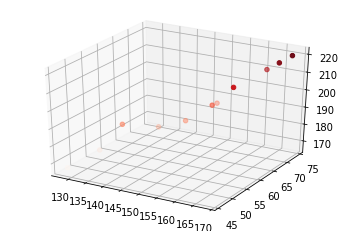

In [0]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
beta_0 = beta1[0,0]
beta_1 = beta1[1,0]
beta_2 = beta1[2, 0]
xd = s_data['X1']
yd = s_data['X2']
zd = s_data['X3']
ax.scatter3D(xd, yd, zd, c=zd, cmap='Reds')

y_hat2 = [(x*beta_1) + (y*beta_2) + beta_0 for x in yd for y in zd]